# Fake News Exploratory Data Analysis

Get subset of FakeNewCorpus data set.

In [70]:
import pandas as pd
import regex as re
from cleantext import clean
raw_data = pd.read_csv('https://raw.githubusercontent.com/several27/FakeNewsCorpus/master/news_sample.csv',index_col=0)
raw_data.head()

,id,domain,type,url,content,scraped_at,inserted_at,updated_at,title,authors,keywords,meta_keywords,meta_description,tags,summary
0,141,awm.com,unreliable,http://awm.com/church-congregation-brings-gift...,Sometimes the power of Christmas will make you...,2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Church Congregation Brings Gift to Waitresses ...,Ruth Harris,NaN,[''],NaN,NaN,NaN
1,256,beforeitsnews.com,fake,http://beforeitsnews.com/awakening-start-here/...,AWAKENING OF 12 STRANDS of DNA – “Reconnecting...,2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,AWAKENING OF 12 STRANDS of DNA – “Reconnecting...,Zurich Times,NaN,[''],NaN,NaN,NaN
2,700,cnnnext.com,unreliable,http://www.cnnnext.com/video/18526/never-hike-...,Never Hike Alone: A Friday the 13th Fan Film U...,2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Never Hike Alone - A Friday the 13th Fan Film ...,NaN,NaN,[''],Never Hike Alone: A Friday the 13th Fan Film ...,NaN,NaN
3,768,awm.com,unreliable,http://awm.com/elusive-alien-of-the-sea-caught...,"When a rare shark was caught, scientists were ...",2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Elusive ‘Alien Of The Sea ‘ Caught By Scientis...,Alexander Smith,NaN,[''],NaN,NaN,NaN
4,791,bipartisanreport.com,clickbait,http://bipartisanreport.com/2018/01/21/trumps-...,Donald Trump has the unnerving ability to abil...,2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Trump’s Genius Poll Is Complete & The Results ...,Gloria Christie,NaN,[''],NaN,NaN,NaN


Perform basic cleaning: remove urls, dates, numbers, emails.

In [71]:
data = raw_data.copy(deep = True)
date_pattern = re.compile(r"([\d]{1,2}[\/|\-][\d]{1,2}(?:[\/|\-][\d]{2,4})?|[\d]{2,4}[\/|\-][\d]{1,2}[\/|\-][\d]{1,2}|(?:january|february|march|april|may|june|july|august|september|october|november|december)[\s][\d]{1,2}[a-z][a-z](?:\s[\d]{2,4})|[\d][\d]\w?\w?\sof\s(?:january|february|march|april|may|june|july|august|september|october|november|december)(?:\s[\d]{2,4})?|(?:january|february|march|april|may|june|july|august|september|october|november|december)\s\d\d?\w?\w?,?(?:\s\d{2,4})?)")

def cleandates(datastring): 

    datastring = date_pattern.sub("date", datastring.lower())
    return datastring


data['content'] = data['content'].apply(cleandates)
data['content'] = [clean(entry,
                              lower=True,
                              no_line_breaks=True,
                              no_emails=True,
                              no_urls=True,
                              no_numbers=True,
                               lang="en",
                               replace_with_number="num",
                               replace_with_email="email",
                               replace_with_url="url"
                              ) for entry in data['content']]
data['content'].head()

0    sometimes the power of christmas will make you...
1    awakening of num strands of dna - "reconnectin...
2    never hike alone: a friday the 13th fan film u...
3    when a rare shark was caught, scientists were ...
4    donald trump has the unnerving ability to abil...
Name: content, dtype: object

Tokenize the text

In [72]:
import nltk
import itertools
from nltk.corpus import stopwords
tokens = list(itertools.chain.from_iterable(data['content'].apply(nltk.word_tokenize)))
stopwords = stopwords.words('english')

Remove stopwords and compute reduction of vocabulary rate after having removed them

In [73]:
vocabulary = set(tokens)
tokens_no_stopwords = [word for word in tokens if word not in stopwords]
vocabulary_no_stopwords = set(tokens_no_stopwords)
print("Reduction rate of removing stopwords: " + str(1 - len(vocabulary_no_stopwords) / len(vocabulary)))

Reduction rate of removing stopwords: 0.007994186046511587


Stem words and compute reduction rate of vocabulary

In [74]:
from nltk.stem.porter import *
stemmer = PorterStemmer()
vocabulary_stem = set([stemmer.stem(word) for word in vocabulary_no_stopwords])
print("Reduction rate of stemming: " + str(1 - len(vocabulary_stem)/len(vocabulary_no_stopwords)))

Reduction rate of stemming: 0.315995115995116


In [75]:
text = nltk.word_tokenize("donald trump was president")
nltk.pos_tag(text)

[('donald', 'NN'), ('trump', 'NN'), ('was', 'VBD'), ('president', 'NN')]

In [76]:
text2 = nltk.word_tokenize("to trump is to ...")
nltk.pos_tag(text2)

[('to', 'TO'), ('trump', 'VB'), ('is', 'VBZ'), ('to', 'TO'), ('...', ':')]

In [77]:
import numpy as np
import matplotlib.pyplot as plt







In [78]:
def pair_keyword_type(keyword): 
    dataarray = []
    for i in range(0,data.__len__()): 
        instances = data.content[i].count(str(keyword))
        dataarray.append((instances,data.type[i]))
    return dataarray

newarray = pair_keyword_type('num')


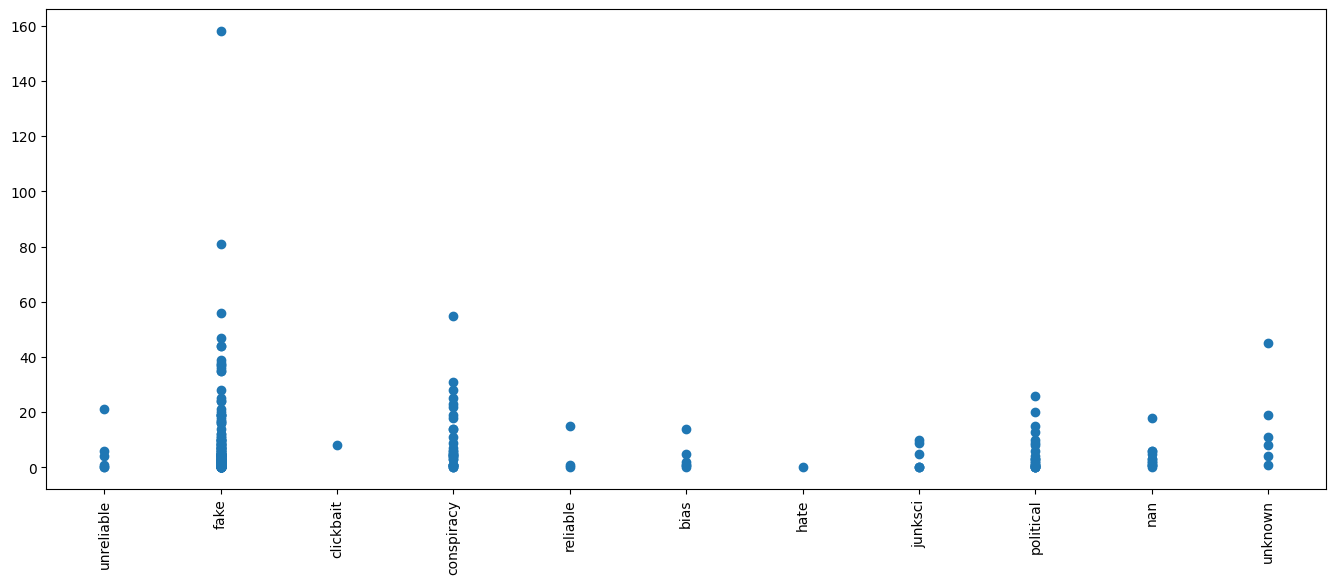

In [133]:
def scatterplot_keyword_type(keyword):
    tuple_array = pair_keyword_type(keyword)
    typearray = []
    countarray = []
    for i in range(0,newarray.__len__()): 
        typearray.append(str(tuple_array[i][1]))
        countarray.append(tuple_array[i][0])
    fig = plt.figure()
    ax =fig.add_axes([0,0,2,1])
    ax.scatter(typearray,countarray)
    plt.xticks(rotation = 'vertical')
    plt.show()

scatterplot_keyword_type('num')

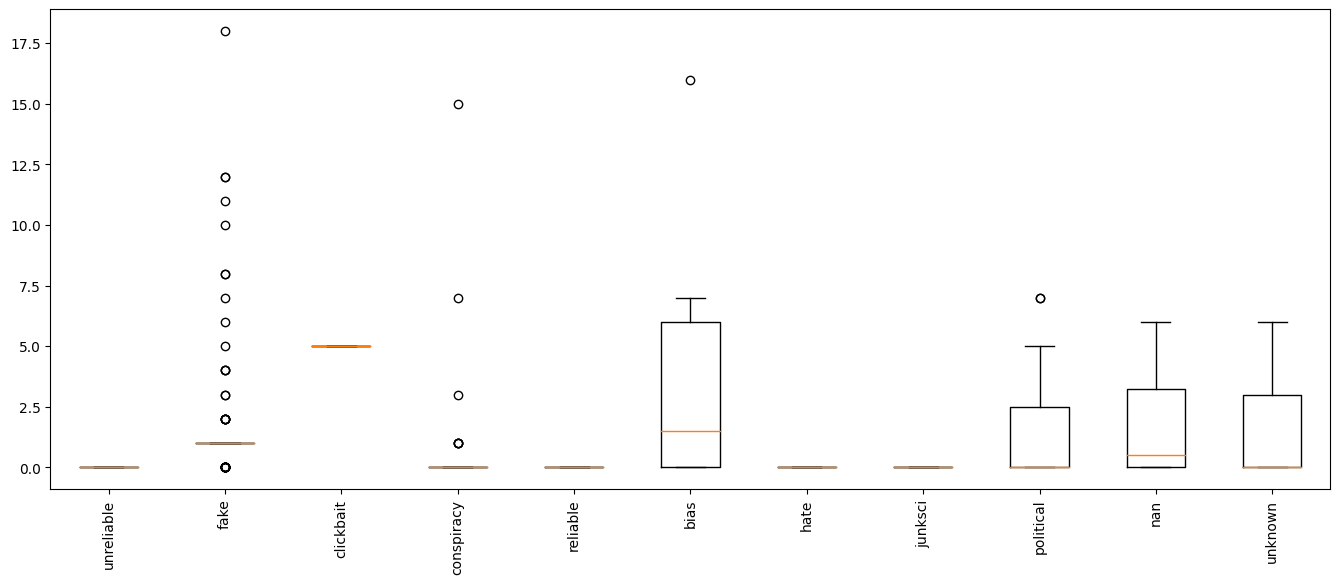

In [101]:
def boxplot_keyword_type(keyword):
    tuple_array=pair_keyword_type(keyword) 
    boxdata=[]
    dict = {}
    for i in range(0,len(tuple_array)):
        if tuple_array[i][1] not in dict:
            dict[tuple_array[i][1]] = [tuple_array[i][0]]
        else:
            dict[tuple_array[i][1]].append(tuple_array[i][0])
    for i in dict:
        boxdata.append(dict[i])
    fig = plt.figure()
    ax =fig.add_axes([0,0,2,1])
    ax.boxplot(boxdata, labels = list(dict.keys()))
    plt.xticks(rotation = 'vertical')
    plt.show()
boxplot_keyword_type('trump')

[2.5, 3.0, 8.0, 5.0, 1.0, 1.5, 0.0, 2.5, 3.0, 2.5, 9.5]
[5.333333333333333, 9.006451612903225, 8.0, 10.516129032258064, 5.333333333333333, 3.8333333333333335, 0.0, 4.0, 5.565217391304348, 4.0, 14.666666666666666]
['unreliable', 'fake', 'clickbait', 'conspiracy', 'reliable', 'bias', 'hate', 'junksci', 'political', 'nan', 'unknown']


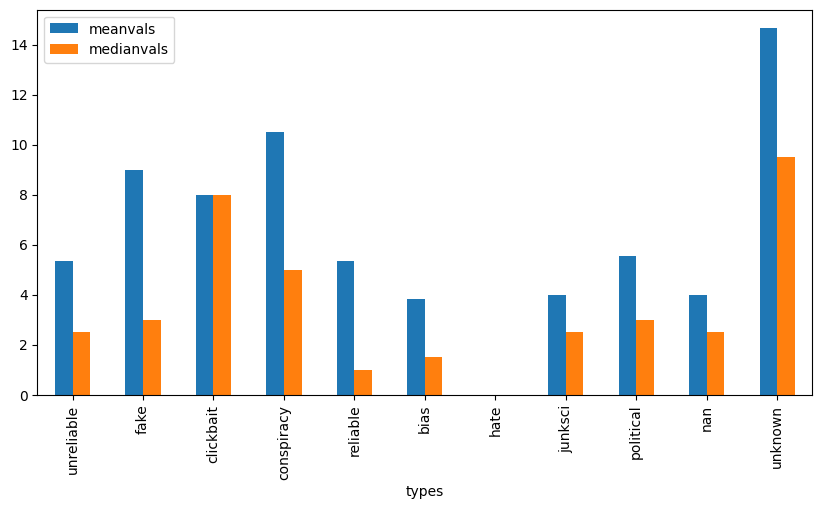

In [132]:
def barplot_keyword_type(keyword): 
    tuple_array = pair_keyword_type(keyword)
    rawdict = {}
    for i in range(0,len(tuple_array)):
        if tuple_array[i][1] not in rawdict:
            rawdict[tuple_array[i][1]] = [tuple_array[i][0]]
        else:
            rawdict[tuple_array[i][1]].append(tuple_array[i][0])

    meandict={}
    for i in rawdict: 
        meandict[i] = np.mean(rawdict[i])
    mediandict={}
    for i in rawdict: 
        mediandict[i] = np.median(rawdict[i])
    
    meanvals =[]
    medianvals=[]

    for i in mediandict:
        medianvals.append(mediandict[i])
    

    for i in meandict:
        meanvals.append(meandict[i])

    types = list(mediandict.keys())
    types = [str(i) for i in types]
    

    print(medianvals)
    print(meanvals)
    print(types)
    df = pd.DataFrame({
    'types': types,
    'meanvals': meanvals,
    'medianvals': medianvals
    })
  

    df.plot(x="types", y=["meanvals", "medianvals"], kind="bar", figsize=(10,5))
    
barplot_keyword_type('num')
    